# Scipy -- Library of scientific algorithms for Python

Based on lecture at http://github.com/jrjohansson/scientific-python-lectures.

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html)) [**moved to numpy**]
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

WARNING: In the new version of python many functionalities are now moved from `scipy` to `numpy`, but they are still available in `scipy` and a deprecated warning is displayed. The work-around is to first import functions from `scipy` and after that from `numpy`, to overwrite scipy functions with the same name.

In [2]:
from scipy import *
from numpy import *

If we only need to use part of the SciPy framework we can selectively include only those modules we are interested in. For example, to include the linear algebra package under the name `la`, we can do:

In [3]:
import scipy.linalg as la

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [4]:
from scipy import special
#help(special)

In [5]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [6]:
n = 0    # order
x = 0.0  # x-point

# Bessel function of first kind
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1e-5
# Bessel function of second kind
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(0.000010) = -7.403160


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

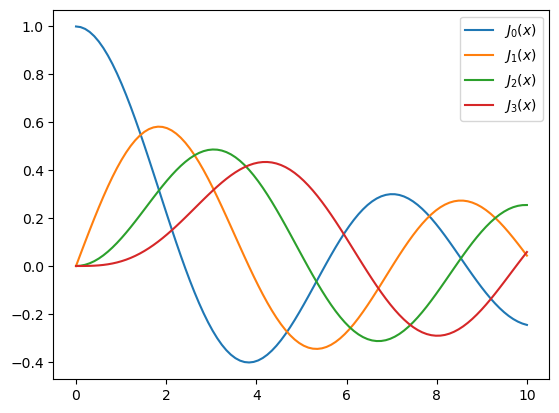

In [8]:
x = linspace(0, 10, 100)


for n in range(4):
    plt.plot(x, jn(n, x), label=('$J_%d(x)$' % n))
plt.legend(loc='best');

Second solution of the same Bessel differential equation: 
$$x^2 y_n''(x)+x y_n'(x)+(x^2-n^2) y_n(x)=0$$

Bessel functions of the first kind $J_n(x)$ are regular at the origin and $Y_n(x)$ are the solution which is irregular at the origin.

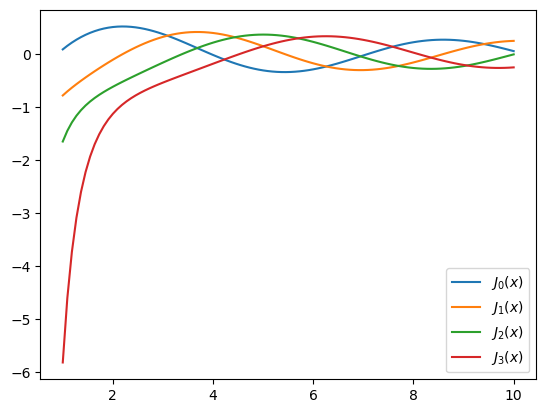

In [9]:
x = linspace(1, 10, 100)
for n in range(4):
    plt.plot(x, yn(n, x), label=('$J_%d(x)$' % n))
plt.legend(loc='best');

## Integration

### Numeric integration with general purpose quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [10]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [11]:
x_lower, x_upper = 0.0, 1.0
val, abserr = quad( lambda x: x**2, x_lower, x_upper)
print('Value=', val, 'error=', abserr)

Value= 0.3333333333333333 error= 3.700743415417188e-15


In [12]:
# help(quad)

In [13]:
print( quad( lambda x: sin(x)/x, 0, 1000))

(1.5702669821983255, 0.24409510202674356)


/var/folders/j8/d9m3r0zx7j37l3ktfl_n1xw00000gn/T/ipykernel_94677/1866967918.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print( quad( lambda x: sin(x)/x, 0, 1000))


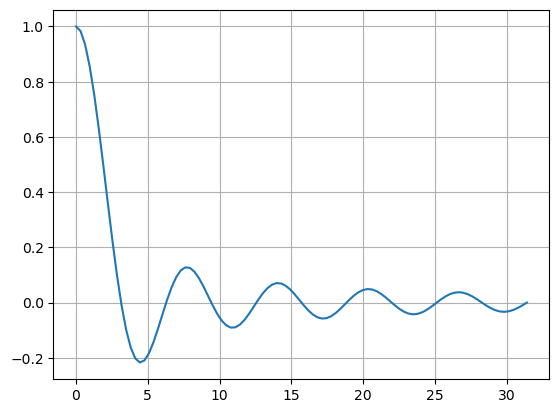

In [14]:
L=10*pi
x=linspace(1e-12,L,100)
plt.plot(x,sin(x)/x)
plt.grid()

If we need to pass extra arguments to integrand function we can use the `args` keyword argument. Let's say we want to evaluate

$f(x) = \displaystyle \int_0^x \frac{j_n(t)+j_m(t)}{t} dt$

In [15]:
# help(quad)

In [16]:
f2 = lambda t,n,m: (jn(n,t)+jn(m,t))/t

def f3(t,n,m):
    return (jn(n,t)+jn(m,t))/t

In [17]:
# First specific case for n=1, m=2, x=1
# integrating  (j_1(t)+j_2(t))/t
quad(f2, 0, 1, args=(1,2))

(0.5396292385998932, 5.991088054545437e-15)

Now simpler: $f_n(x) = n \displaystyle \int_0^x \frac{j_n(t)}{t} dt$

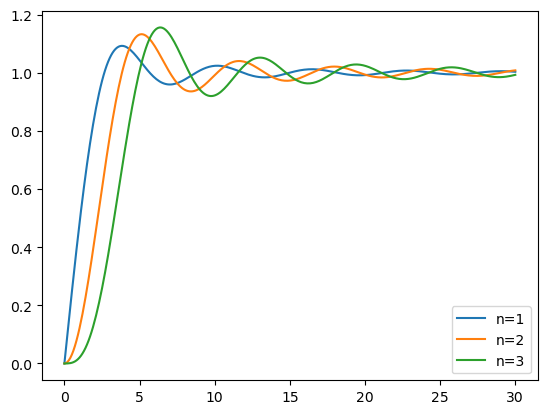

In [18]:
xs = linspace(1e-10,30,300) # mesh for x-variable

for ns in range(1,4): # n in 0,1,2,3
    fs=[ns * quad(lambda t,n: jn(n, t)/t, 0, x, args=(ns,))[0] for x in xs]
    plt.plot(xs,fs, label='n='+str(ns))
plt.legend(loc='best')

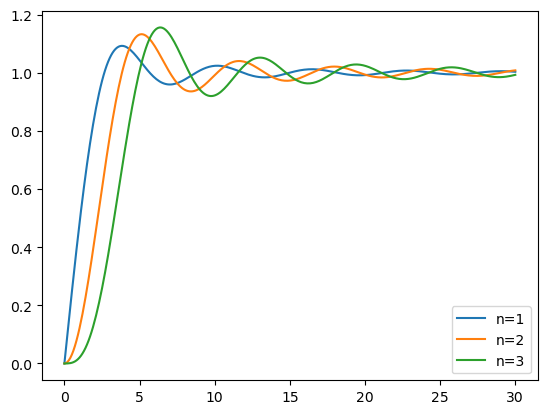

In [19]:
# here we can get away withouth args since function is defined inline

for ns in range(1,4):
    fs=[ns * quad(lambda t: jn(ns, t)/t, 0, x)[0] for x in xs]
    plt.plot(xs,fs, label='n='+str(ns))
plt.legend(loc='best')

Higher-dimensional integration works in the same way:

Note that we pass lambda functions for the limits for the y integration, since these in general can be functions of x.

`dblquad`:
\begin{equation}
\int_{x_a}^{x_b} dx \int_{y_a(x)}^{y_b(x)} dy f(x,y)
\end{equation}

`tplquad`:
\begin{equation}
\int_{x_a}^{x_b} dx \int_{y_a(x)}^{y_b(x)} dy \int_{z_a(x,y)}^{z_b(x,y)} dz f(x,y,z)
\end{equation}

In [20]:
def integrand(x, y, z):
    return exp(-x**2-y**2-z**2)

x_a,x_b = 0,10
y_a,y_b = 0,10
z_a,z_b = 0,10

val1, abserr = dblquad(integrand, x_a, x_b, lambda x:y_a, lambda x:y_b, args=(0,))

val2, abserr = tplquad(integrand, x_a, x_b, lambda x:y_a, lambda x:y_b, lambda x,y:z_a, lambda x,y:z_b)

print(val1, val2, abserr)

0.7853981633974476 0.6960409996039545 1.4675161390126584e-08


## Ordinary differential equations (ODEs)

SciPy provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module

In [21]:
from scipy import *
from numpy import *
from scipy.integrate import odeint, ode

A system of ODEs should be formulated in standard form, which is:

$y' = f(y, t)$

where we are searching for function $y(t)$ and
where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and its initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives. 

For example, for second order differential equation $$y''(t)=f(y,y',t)$$ we can choose 
$$Y(t) = [ y(t), y'(t)]$$ and then $$\frac{dY(t)}{dt}=[y'(t),y''(t)]$$ which can be expressed as
$$[\frac{dY_0(t)}{dt},\frac{dY_1(t)}{dt}]=[Y_1(t),f(Y_0(t),Y_1(t),t)].$$

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [22]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [23]:
# help(odeint)

In [24]:
def dx(x,t):
    """
    The right-hand side of the pendulum ODE
    x=[x1,x2,x3,x4]
    """
    g, L, m = 9.82, 1., 1.
    x1,x2,x3,x4 = x # x is array
    c1 = 1/(m*L**2)
    dx1 = 6.*c1 * (2*x3-3*cos(x1-x2)*x4)/(16.-9.*cos(x1-x2)**2)
    dx2 = 6.*c1 * (8*x4-3*cos(x1-x2)*x3)/(16.-9.*cos(x1-x2)**2)
    dx3 = -0.5/c1 * (dx1*dx2 * sin(x1-x2) + 3*g/L * sin(x1))
    dx4 = -0.5/c1 * (-dx1*dx2 * sin(x1-x2)+ g/L * sin(x2))
    return array([dx1,dx2,dx3,dx4])

In [25]:
# choose an initial state
x0 = [pi/4, pi/2, 0, 0]

# time coodinate to solve the ODE for: from 0 to 10 seconds
t = linspace(0, 10, 250)

In [26]:
# solve the ODE problem
x = odeint(dx, x0, t)

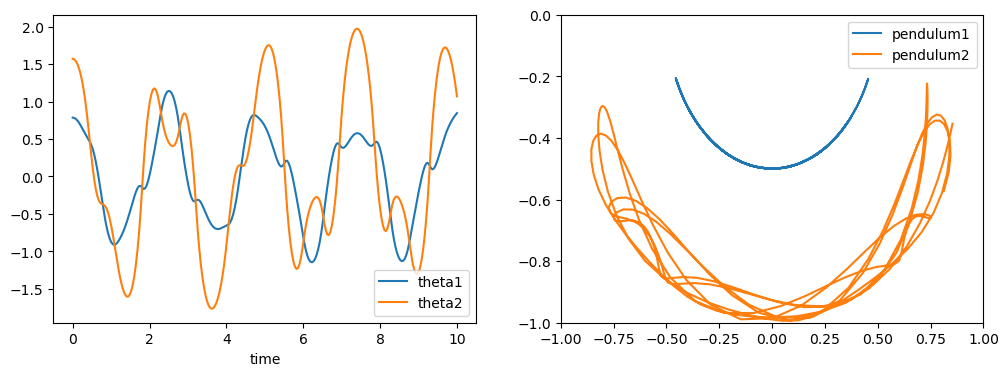

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt


# plot the angles as a function of time
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(t, x[:, 0], label="theta1")
axes[0].plot(t, x[:, 1], label="theta2")
axes[0].legend(loc='best')
axes[0].set_xlabel('time')

L = 0.5
x1 =  L * sin(x[:, 0])
y1 = -L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, label="pendulum1")
axes[1].plot(x2, y2, label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([-1, 1])
axes[1].legend(loc='best');

examples for subplot creation: 
https://towardsdatascience.com/the-many-ways-to-call-axes-in-matplotlib-2667a7b06e06

matplotlib examples:
https://matplotlib.org/3.1.1/gallery/index.html

See animation in `pendulum.py`.

(To get it work within jupyter seems a bit challenging at the moment.)

### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [28]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y #y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return array([dx, dp])

In [29]:
from numpy import *

# initial state: 
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [30]:
from scipy.integrate import odeint

# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

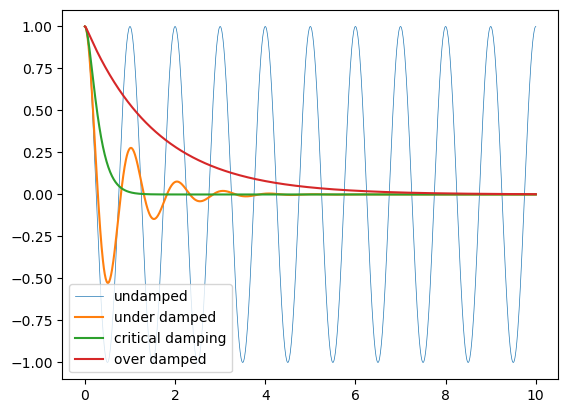

In [114]:
import pylab as plt

plt.plot(t, y1[:,0], label="undamped", linewidth=0.5)
plt.plot(t, y2[:,0], label="under damped")
plt.plot(t, y3[:,0], label=r"critical damping")
plt.plot(t, y4[:,0], label="over damped")
plt.legend();

## Fourier transform

Fourier transforms are one of the universal tools in computational physics, which appear over and over again in different contexts: solving partial DE, quantum mechanics, etc. 

SciPy provides functions for accessing the classic [FFTPACK](http://www.netlib.org/fftpack/) library from NetLib, which is an efficient and well tested FFT library written in FORTRAN. The SciPy API has a few additional convenience functions, but overall the API is closely related to the original FORTRAN library.


Mathematically Fourier transfrom is an operation that produces frequency distribution of a function:
\begin{eqnarray}
F(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{i\omega t} f(t) dt
\end{eqnarray}

One way to picture this operation is to think of a sound wave: The Fourier transform is analogous to decomposing the sound of a musical chord into the intensities of its constituent pitches.

The important property is that its inverse exists and gives back the original function:

\begin{eqnarray}
f(t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t} F(\omega) d\omega
\end{eqnarray}


The proof is relatively straighforward. We insert expression for $F(\omega)$ into the second equation, and get
\begin{eqnarray}
f(t) = \frac{1}{2\pi}  \int_{-\infty}^{\infty}d\omega e^{-i\omega t} \int_{-\infty}^{\infty}
dt' e^{i\omega t'} f(t')=\frac{1}{2\pi}
\int_{-\infty}^{\infty}dt' f(t')\int_{-\infty}^{\infty}d\omega e^{i\omega (t'-t)} 
\end{eqnarray}

Next we will prove that
\begin{eqnarray}
\frac{1}{2\pi}\int_{-\infty}^{\infty}d\omega e^{i\omega (t'-t)} =\delta(t-t')
\end{eqnarray}
which is the Kronecker $\delta$ function, and has property that 
\begin{equation}
\int_{-\infty}^{\infty}dt' f(t')\delta(t-t')=f(t)
\end{equation}

The properies of the Kronecker $\delta(\tau)$ functions are that for a small $\varepsilon$:
\begin{eqnarray}
&& \delta(\tau)=0 ; |\tau|>\varepsilon \\
&& \int_{-\varepsilon}^{\varepsilon}\delta(\tau) = 1
\end{eqnarray}

We need to prove that
\begin{eqnarray}
\frac{1}{2\pi}\int_{-\infty}^{\infty}d\omega e^{i\omega \tau} =\delta(\tau)
\end{eqnarray}

If $\tau$ is nonzero, the value is vanishig as long as the limits in $\infty$ are properly arranged.
The second property of $\delta$ function still needs to be proven:
\begin{eqnarray}
&&\frac{1}{2\pi}\int_{-\varepsilon}^{\varepsilon} d\tau \int_{-\infty}^{\infty}d\omega e^{i\omega \tau} =^? 1\\
&&\frac{1}{2\pi} \int_{-\infty}^{\infty}d\omega \int_{-\varepsilon}^{\varepsilon} d\tau e^{i\omega \tau}=
\frac{1}{2\pi} \int_{-\infty}^{\infty}d\omega \frac{e^{i\omega\epsilon}-e^{-i\omega\epsilon}}{i\omega}=
\frac{1}{2\pi} \int_{-\infty}^{\infty}d\omega \frac{2 i \sin(\omega\epsilon)}{i\omega}=
\frac{1}{\pi} \int_{-\infty}^{\infty}d x \frac{\sin(x)}{x}=1
\end{eqnarray}


In [32]:
from math import *
from scipy import integrate

r=integrate.quad(lambda x: sin(x)/x, 1e-6,200.)
r[0]/pi

0.4992312856179283

In [33]:
from scipy import special
# help(special.sici)

In [34]:
from scipy import special
special.sici(100000.)[0]/pi


0.5000031810631101

Note that Fourier transform of a real function is in general a complex function because

\begin{eqnarray}
\textrm{Im}(F(\omega)) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \sin(\omega t) f(t)dt
\end{eqnarray}

Only if $f(t)$ is even function of $t$ the imaginary part of $F$ vanishes, and $F(\omega)$ is real.

If $f(t)$ is a real function, than $F(\omega)$ has to satisfy the constrain:

\begin{eqnarray}
F^*(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-i\omega t} f(t) dt = F(-\omega)
\end{eqnarray}

which means that the real part $Re F(\omega)= Re F(-\omega)$ is even, and $Im F(\omega)=-Im F(-\omega)$ is odd.

## Periodic functions with period T

Note also that periodic functions have descrete frequency only, i.e., $F(\omega)$ is nonzero only for discrete set of numbers (discrete function).

The best way to see this is to request that function $f(t)$ is perodic and hence $f(t+T)=f(t)$ where $T$ is a period.
Than we know that 
\begin{eqnarray}
f(t) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega F(\omega) e^{-i\omega t}=f(t+T)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty d\omega F(\omega) e^{-i\omega t-i\omega T}
\end{eqnarray}

and for this to be true, we must have $\omega T = 2\pi n$, or, $\omega_n = 2\pi n/T$. This means that frequency is descrete and only values $\omega_n=2\pi n/T$ are allowed, where $n$ is integer. If $T$ is large, there are still a lot of freuquencies in every small interval allowed.

For discrete case, we usually choose different normalization of functions. Instead of $F(\omega_n)$ we can use more appropriate normalization $\widetilde{F}(\omega_n)$ such that

\begin{eqnarray}
f(t) = \frac{1}{\sqrt{T}}\sum_n \widetilde{F}(\omega_n)e^{-i\omega_n t}\\
\widetilde{F}(\omega_n) = \frac{1}{\sqrt{T}}\int_{t_0}^{t_0+T} f(t) e^{i\omega_n t} dt
\end{eqnarray}

We can prove that this is correct normalization, because 
$$\frac{1}{T}\int_{t_0}^{t_0+T}dt e^{i 2\pi(n-n')\frac{t}{T}} = \delta_{n-n'}$$

## Discretized functions for practical FFT

Finally, in practice we discretize the funtion 
\begin{eqnarray}
f(t) = \frac{1}{N}\sum_{j=0}^{N-1} \delta(t-t_j) f(t_j)
\end{eqnarray}

If we rename $f(t_j)\equiv f_j$ and $F(\omega_n)\equiv F_n$ we arrive at the discrete Fourier transform. 

For the variable $\frac{t}{T}$, we choosen to be disributed between $[0,1]$ ($t_0$ is set to 0). For a number distributed between $[0,1]$ we can choose enumeration $j/N$, where $j\in [0,N-1]$, i.e, $t = T j/N$ with $N$ being a large number. Then $\omega_n t_j= 2\pi n\; t_j/T = 2\pi n j/N$. The discrete Fourier transform thus takes the form
\begin{eqnarray}
&& F_n  = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1} f_j e^{i 2\pi n j/N}\\
&& f_j = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} F_n e^{-i 2\pi n j/N}
\end{eqnarray}


The unusal feature of FFT algorithm is that it can be done in $O(N \log(N))$ time, rather than $O(N^2)$ time, as naively estimated from the above equation.

In QM position ($x$) and momentum($p$) are connected by Fourier transform. Similarly time $t$ and energy $E=\omega/\hbar$ are connected by Fourier transform.

Fourier transform is also used in solving partial differential equations.

Some examples displayed below:

![FFT example 1](img/FF_example1.pdf)
![FFT example 2](img/FF_example2.pdf)
![FFT example 3](img/FF_example3.pdf)
![FFT example 4](img/FF_example4.pdf)

To use the `fftpack` module in a python program, include it using:

In [113]:
from scipy.fftpack import *
from numpy.fft import fftfreq

To demonstrate how to do a fast Fourier transform with SciPy, let's look at the FFT of the solution to the damped oscillator from the previous section:

In [121]:
# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(len(t), t[1]-t[0])

In [122]:
T = len(t)*(t[1]-t[0])
print('Period T={:f}  distance domega= 1/T={:f} last point=(N/2-1)/T={:f} first point=-N/(2T)={:f}'.format(
    T, 1/T, (len(t)/2-1)*1/T, -len(t)/(2*T) ))

Period T=10.010010  distance domega= 1/T=0.099900 last point=(N/2-1)/T=49.850100 first point=-N/(2T)=-49.950000


In [123]:
# w_n=n/(len(t)*(t[1]-t[0])) == n/T
# note that analytically we expect w_n = 2*pi * n/T

print(range(10)/(len(t)*(t[1]-t[0])))
w

[0.     0.0999 0.1998 0.2997 0.3996 0.4995 0.5994 0.6993 0.7992 0.8991]


array([  0.    ,   0.0999,   0.1998,   0.2997,   0.3996,   0.4995,
         0.5994,   0.6993,   0.7992,   0.8991,   0.999 ,   1.0989,
         1.1988,   1.2987,   1.3986,   1.4985,   1.5984,   1.6983,
         1.7982,   1.8981,   1.998 ,   2.0979,   2.1978,   2.2977,
         2.3976,   2.4975,   2.5974,   2.6973,   2.7972,   2.8971,
         2.997 ,   3.0969,   3.1968,   3.2967,   3.3966,   3.4965,
         3.5964,   3.6963,   3.7962,   3.8961,   3.996 ,   4.0959,
         4.1958,   4.2957,   4.3956,   4.4955,   4.5954,   4.6953,
         4.7952,   4.8951,   4.995 ,   5.0949,   5.1948,   5.2947,
         5.3946,   5.4945,   5.5944,   5.6943,   5.7942,   5.8941,
         5.994 ,   6.0939,   6.1938,   6.2937,   6.3936,   6.4935,
         6.5934,   6.6933,   6.7932,   6.8931,   6.993 ,   7.0929,
         7.1928,   7.2927,   7.3926,   7.4925,   7.5924,   7.6923,
         7.7922,   7.8921,   7.992 ,   8.0919,   8.1918,   8.2917,
         8.3916,   8.4915,   8.5914,   8.6913,   8.7912,   8.8

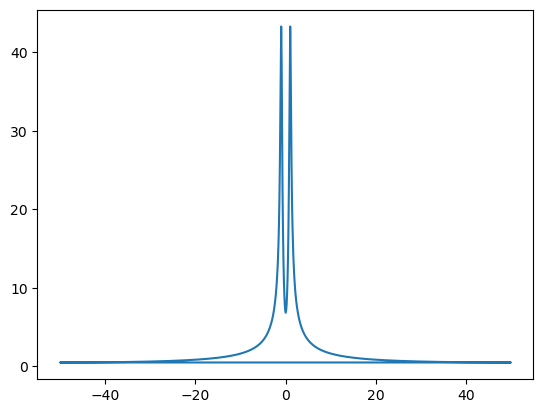

In [125]:
plt.plot(w, abs(F));
#plt.xlim([-5,5])

Frequencies are sorted in inconvenient way. First is $\omega_n=0$, followed by all positive frequencies, and than followed by all negative frequencies. The frequnecy thus jumps from $\frac{(N-2)}{2 T}$ to $-\frac{N}{2 T}$. The reason for that is efficiency of FFT routine.


To make sense of this output, we sort the frequencies in ascending order:

In [126]:
indx=sorted(range(len(w)),key=lambda i: w[i])

The frequencies are also missing $2\pi$ from our definitions. The discrete frequencies should be $2\pi n/T$, but the program gives us $n/T$, with $n$ between $-N/2$ to $N/2-1$ (for even $N$).

In [127]:
indx

[500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666

In [128]:
ws = 2*pi*w[indx]
Fs = F[indx]

(-30.0, 30.0)

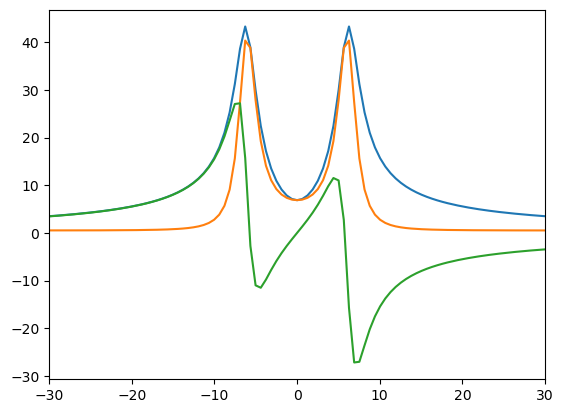

In [129]:
plt.plot(ws, abs(Fs));
plt.plot(ws, Fs.real);
plt.plot(ws, Fs.imag);
plt.xlim([-30,30])

Properties of Fourier transform of a real signal:
\begin{eqnarray}
&& F(\omega) = \int e^{i\omega t} x(t) dt\\
&& F^*(\omega) = F(-\omega)\\
&& Re(F(\omega)) = Re(F(-\omega))\\
&& Im(F(\omega)) = -Im(F(-\omega))
\end{eqnarray}

The spectrum is peaked at $2\pi$, because our frequency $\omega_0=2\pi$. The damping adds a lot of additional frequencies to the spectrum. The spectrum has correct properties.

Can we use the inverse Fourier transform to get the original spectra back?

Inverse Fourier is obtained by `ifft`.

In [130]:
ft = ifft(Fs)

ts = fftfreq(len(ws), ws[1]-ws[0])*2*pi

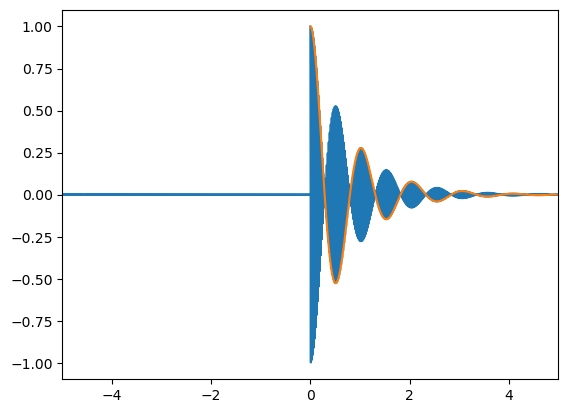

In [131]:
plt.plot(ts,ft.real)
plt.xlim([-5,5])
plt.plot(t,y2[:,0]);

It seems similar, but something seems wrong.... Every second point is correct, but every second point has exactly minus sign as compared to expectations.
Why?

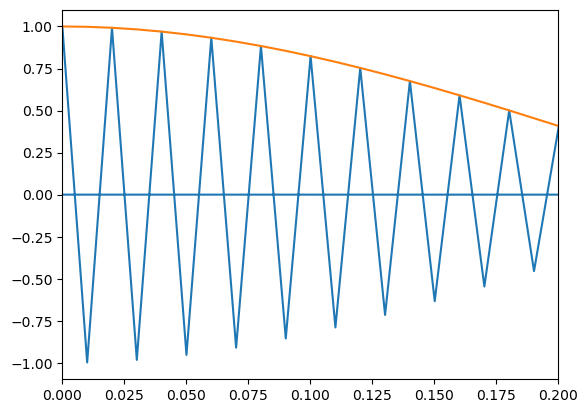

In [132]:
plt.plot(ts,ft.real)
plt.xlim([0,0.2])
plt.plot(t,y2[:,0])

The issue is that if variable $t$ starts with 0 and extends to $T$, than frequency should also start with $\omega=0$ and end with $\omega_{max}$. Alternatively, we could shift all functions to start with $t\in[-T/2,T/2]$ and $\omega=[-\omega_{max}/2,\omega_{max}/2]$.

What we expect from FFT is
\begin{eqnarray}
f(t_i) = \frac{1}{\sqrt{N}} \sum_{n=-N/2}^{n=N/2-1} e^{-i\omega_n t_i} F_n
\end{eqnarray}
where $\omega_n=2\pi n/T$. But what FFT does is
\begin{eqnarray}
f(t_i)=\frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} e^{-i\omega_n t_i} F_n
\end{eqnarray}

To correct for that, we can multiply the result with the Nyquist frequency phase $e^{-i\omega_{-N/2} t_i}$:

\begin{eqnarray}
f(t_i) = \frac{1}{\sqrt{N}} \sum_{n=-N/2}^{n=N/2-1} e^{-i\omega_n t_i} F_n = e^{-i\omega_{-N/2} t_i}
\frac{1}{\sqrt{N}} \sum_{n=-N/2}^{N/2-1} e^{-i(\omega_n-\omega_{-N/2}) t_i} F_n=
e^{-i\omega_{-N/2} t_i}\frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} e^{-i\omega_n t_i} F_n
\end{eqnarray}

In [46]:
from numpy import *

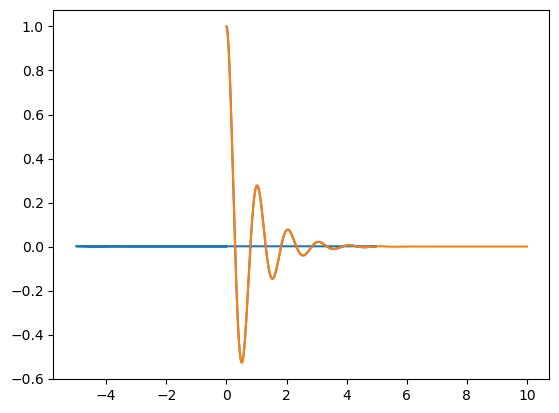

In [133]:
plt.plot(ts,(ft * exp(-1j*ts*ws[0])).real)

plt.plot(t,y2[:,0])

Now it works. Our plot extends from $[-5,5]$ instead of $[0,10]$, so the values $[5,10]$ are found in $[-5,0]$.

Since this issue with the shift of the function is very common, FFT implements a function called `fftshift`, which shifts the spectra so that we can start summation with $\omega_n=0$. Check it out below:

In [134]:
Fs2 = fftshift(Fs)
f2=ifft(Fs2)

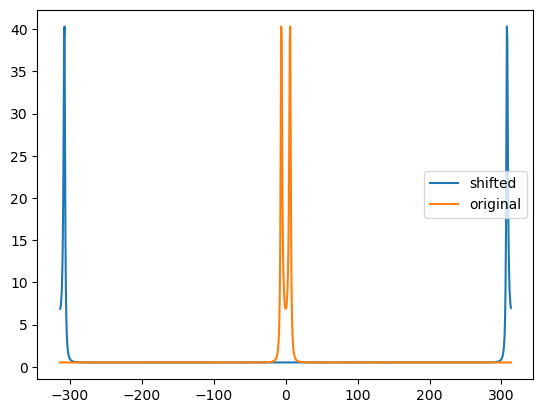

In [135]:
plt.plot(ws,Fs2,label='shifted' )
plt.plot(ws,Fs,label='original')
plt.legend(loc='best')

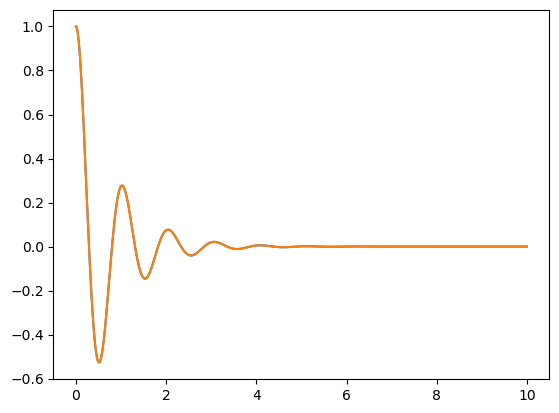

In [136]:
plt.plot(t,y2[:,0],label='original')
plt.plot(t,f2,label='transformed')

Now the result is exactly what is expected, even the interval is between $[0,10]$.

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

To use the optimization module in scipy first include the `optimize` module:

In [69]:
from scipy import optimize

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

In [188]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

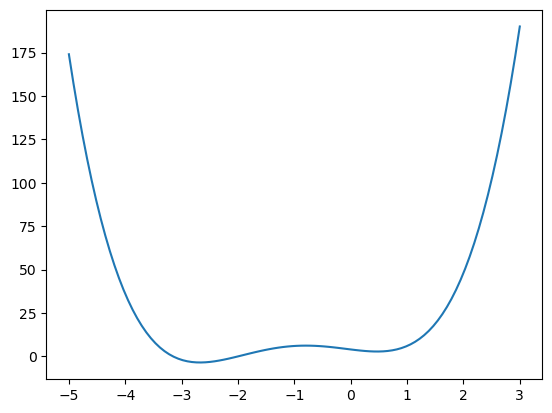

In [189]:
x = linspace(-5, 3, 100)
plt.plot(x, f(x));

We can use the `fmin_bfgs` function to find the minima of a function:

In [194]:
optimize.minimize(f,-0.)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.804987644868778
        x: [ 4.696e-01]
      nit: 4
      jac: [-1.073e-06]
 hess_inv: [[ 6.288e-02]]
     nfev: 14
     njev: 7

In [196]:
res=optimize.minimize(f,-2)
print(res.x)

[-2.67298151]


In [197]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.67298151])

In [156]:
optimize.minimize(f,0.5,method='L-BFGS-B')

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.8049876448711224
        x: [ 4.696e-01]
      nit: 3
      jac: [ 8.837e-06]
     nfev: 10
     njev: 5
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [157]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

We can also use the `brent` or `fminbound` functions. They have a bit different syntax and use different algorithms. 

In [158]:
optimize.brent(f, brack=(1,2))

0.4696174340948085

In [159]:
optimize.minimize_scalar(f, bracket=(1,2), method='brent')

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.804987644868733
       x: 0.4696174340948085
     nit: 12
    nfev: 15

In [163]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

In [198]:
# supposedly global optimization seems to fail
optimize.basinhopping(f,2)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 2.8049876448687328
                          x: [ 4.696e-01]
                        nit: 100
      minimization_failures: 0
                       nfev: 1374
                       njev: 687
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 2.8049876448687328
                                    x: [ 4.696e-01]
                                  nit: 6
                                  jac: [ 1.490e-07]
                             hess_inv: [[ 6.277e-02]]
                                 nfev: 16
                                 njev: 8

### Finding a solution to a function, i.e., zeros

To find the root for a function of the form $f(x) = 0$ we can use the `fsolve` function. 

It is based on Powell's hybrid method as implemented in MINPACK’s library (hybrd):
https://www.extremeoptimization.com/Documentation/Mathematics/Solving-Equations/Solving-Systems-of-Non-Linear-Equations.aspx

*Powell's dogleg method, also called Powell's hybrid method, attempts to minimize the sum of the squares of the function values. It does this using a combination of **Newton's** method and the **steepest descent** method. This is a so-called trust region method. This means that every step moves the current point to within a finite region. This makes the method more stable than Newton's method.*


*On the other hand, the fact that the method is, in essence, a specialized minimizer means that the algorithm can get stuck in a local minimum that does not correspond to a solution of the system of equations.*


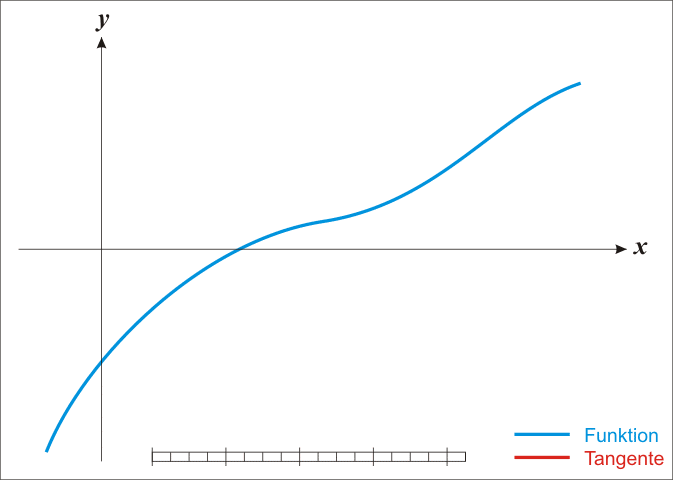

In [51]:
Image('https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif')

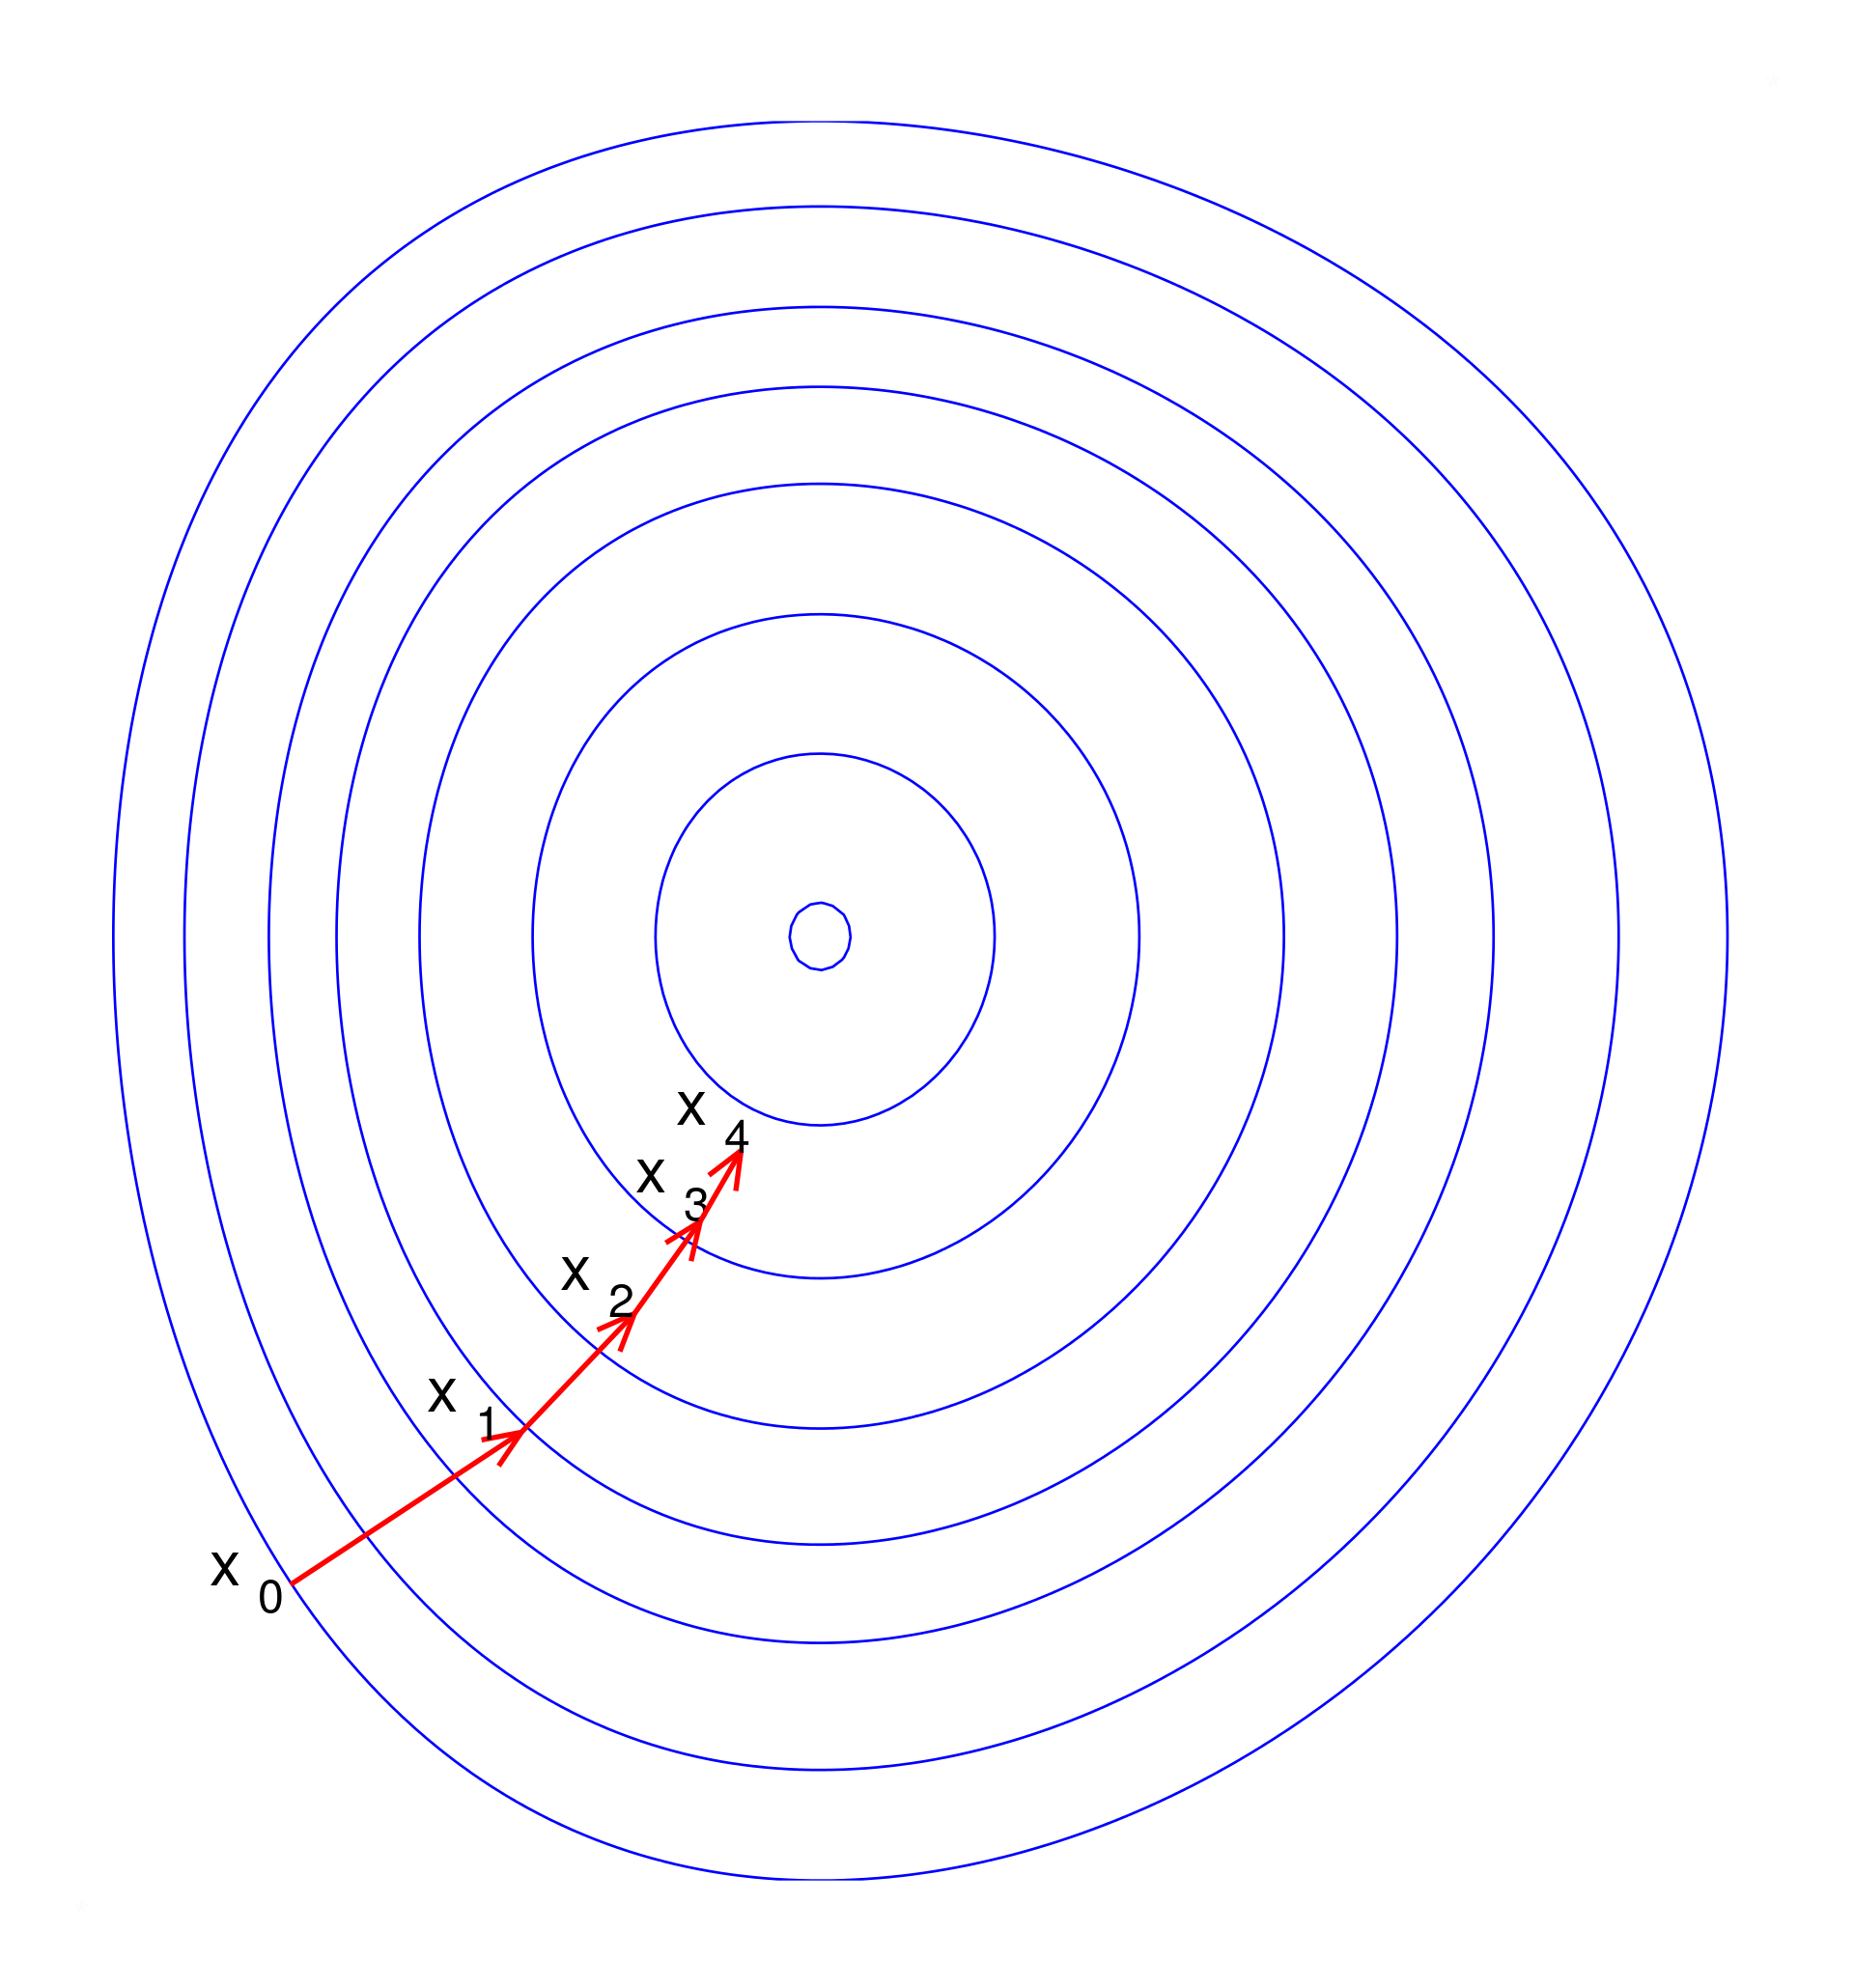

In [52]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/1920px-Gradient_descent.svg.png')


To use fsolve, we need an initial guess: 

In [199]:
from numpy import * # to have tan(array) defined

omega_c = 3.0
def f(omega):
    # a transcendental equation: resonance frequencies of a low-Q SQUID terminated microwave resonator
    return tan(2*pi*omega) - omega_c/omega

(-5.0, 5.0)

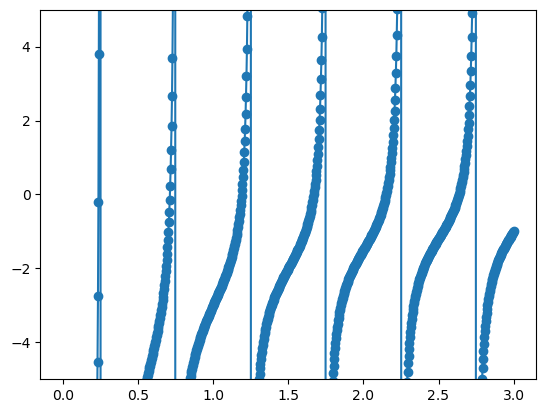

In [201]:
x = linspace(1e-6, 3, 1000)
y = f(x)
plt.plot(x,y,'o-')
plt.ylim(-5,5)

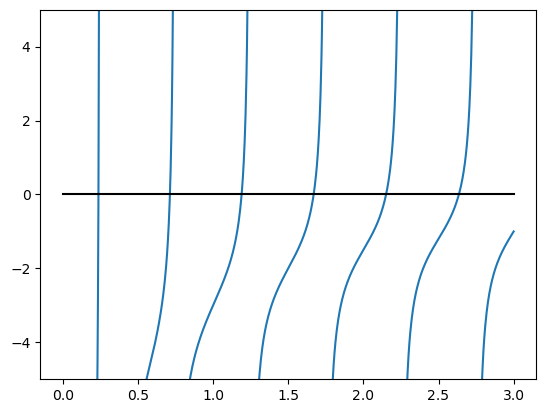

In [203]:
x = linspace(1e-6, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN # get rid of vertical line when the function flip sign

plt.plot(x, y)
plt.plot([0, 3], [0, 0], 'k')
plt.ylim(-5,5);

In [204]:
optimize.fsolve(f, 0.1)

array([0.23743014])

In [205]:
optimize.fsolve(f, 0.6)

array([0.71286972])

In [206]:
optimize.fsolve(f, 1.1)

array([1.18990285])

Change of sign can occur when there is a zero or a pole. 
To use bracketing technique, we need to carefully bracket the zeros (and not the poles)

In [207]:
f(0.01),f(0.5)

(-299.93708533274634, -6.0)

In [208]:
f(0.001),f(0.25),f(0.3),f(0.73)

(-2999.993716732008,
 1.6331239353195358e+16,
 -13.077683537175254,
 3.806226047209912)


`toms748(f, a, b, args=(), k=1, xtol=2e-12, rtol=8.881784197001252e-16,
         maxiter=100, full_output=False, disp=True)`
       
Finds a zero of the function `f` on the interval `[a , b]`, where `f(a)` and
`f(b)` must have opposite signs.

It uses a mixture of inverse cubic interpolation and
"Newton-quadratic" steps. [APS1995].

In [209]:
[optimize.toms748(f,0.01,0.25),optimize.toms748(f, 0.3, 0.73)]

[0.2374301406360339, 0.7128697158579146]

In [215]:
optimize.brentq(f, 0.25, 0.3)

0.25000000000145517

In [185]:
optimize.toms748(f,-0.012,0.01)
optimize.fsolve(f, 1e-16)

array([0.23743014])

## Interpolation

Interpolation is simple and convenient in scipy: The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value:


<a href="https://www.youtube.com/watch?v=NXoQZ8WVPH4">Interpolation for Beginners 2 Lagrange Polynomial</a>

<a href="https://www.youtube.com/watch?v=ZdsrGFjgph8">Interpolation for Beginners 3 Smarter Lagrange Interpolation</a>

<a href="https://www.youtube.com/watch?v=2YmCaxcKyBY">Interpolation for Beginners 4 Cubic Splines</a>

In [4]:
from scipy.interpolate import *
from numpy import *

In [5]:
def f(x):
    return sin(x)

In [60]:
n = linspace(0, 9, 10)  
x = linspace(0, 9, 300)

y_meas = f(n) + 0.05 * random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas, kind='linear')
y_interp1 = linear_interpolation(x)

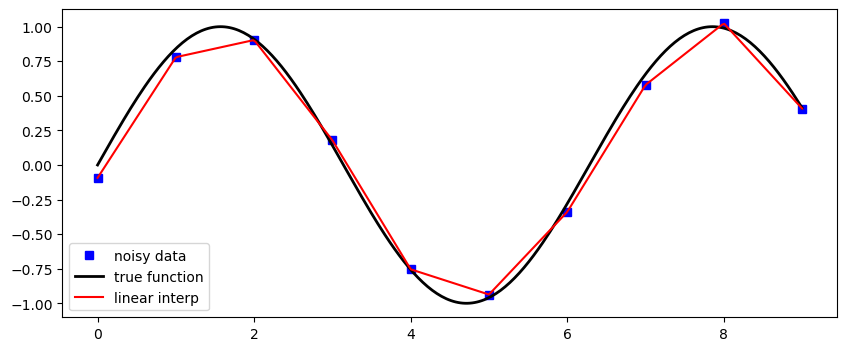

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
plt.legend(loc='best')

In [72]:
cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

cubic_smooth = UnivariateSpline(n, y_meas,s=0)
y_interp3 = cubic_smooth(x)

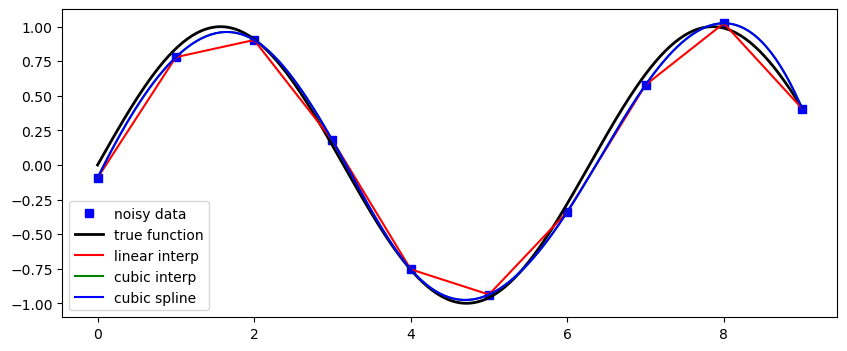

In [73]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.plot(x, y_interp3, 'b', label='cubic spline')
ax.legend(loc=3);

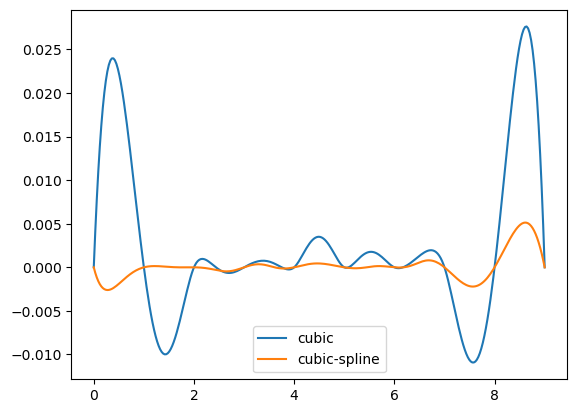

In [74]:
cubic_interpolation = interp1d(n, f(n), kind='cubic')
diff = cubic_interpolation(x)-f(x)

cubic_smooth = UnivariateSpline(n, f(n), s=0., k=4)
diff2 = cubic_smooth(x)-f(x)

plt.plot(x, diff, label='cubic')
plt.plot(x, diff2, label='cubic-spline')
plt.legend(loc='best')

In [76]:
help(UnivariateSpline)

Help on class UnivariateSpline in module scipy.interpolate._fitpack2:

class UnivariateSpline(builtins.object)
 |  UnivariateSpline(x, y, w=None, bbox=[None, None], k=3, s=None, ext=0, check_finite=False)
 |  
 |  1-D smoothing spline fit to a given set of data points.
 |  
 |  Fits a spline y = spl(x) of degree `k` to the provided `x`, `y` data.  `s`
 |  specifies the number of knots by specifying a smoothing condition.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      1-D array of independent input data. Must be increasing;
 |      must be strictly increasing if `s` is 0.
 |  y : (N,) array_like
 |      1-D array of dependent input data, of the same length as `x`.
 |  w : (N,) array_like, optional
 |      Weights for spline fitting.  Must be positive.  If `w` is None,
 |      weights are all 1. Default is None.
 |  bbox : (2,) array_like, optional
 |      2-sequence specifying the boundary of the approximation interval. If
 |      `bbox` is None, ``bbox=[x[0], x[-1]]

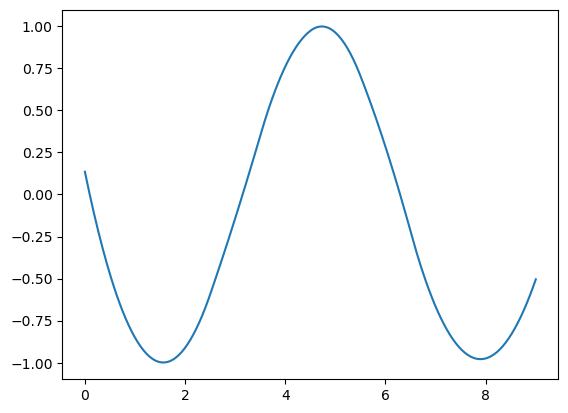

In [81]:
df = cubic_smooth.derivative(n=2)
plt.plot(x, df(x))

/var/folders/j8/d9m3r0zx7j37l3ktfl_n1xw00000gn/T/ipykernel_95173/2850629994.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dcubic_interpolation=[der(cubic_interpolation, t, 0.01,n=2) for t in x[1:-1]]


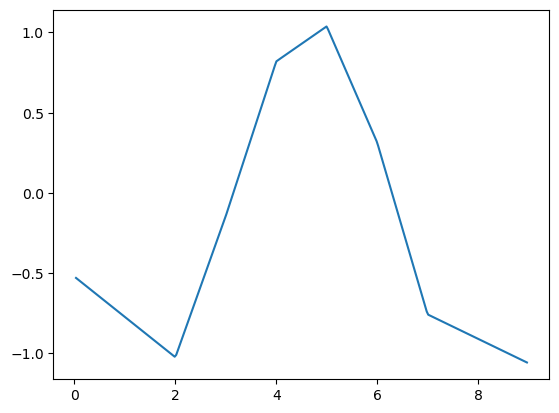

In [83]:
from scipy.misc import derivative as der

#cubic_interpolation.derivative()
dcubic_interpolation=[der(cubic_interpolation, t, 0.01,n=2) for t in x[1:-1]]
plt.plot(x[1:-1], dcubic_interpolation)

`interpolate.make_interp_spline` allows boundary condition at the two ends.

`bc_type2 -- tuple or None`

Default is `None`, which means choosing the boundary conditions automatically. Otherwise, it must be a length-two tuple where the first element sets the boundary conditions at `x[0]` and the second element sets the boundary conditions at `x[-1]`. Each of these must be an iterable of pairs (order, value) which gives the values of derivatives of specified orders at the given edge of the interpolation interval. Alternatively, the following string aliases are recognized:`

* "clamped": The first derivatives at the ends are zero. This is equivalent to bc_type=([(1, 0.0)], [(1, 0.0)]).
* "natural": The second derivatives at ends are zero. This is equivalent to bc_type=([(2, 0.0)], [(2, 0.0)]).
* "not-a-knot" (default): The first and second segments are the same polynomial. This is equivalent to having bc_type=None. In this case the spline requires that the third derivative of the spline is continuous at `x[0]` and `x[-1]`

Also `interp2d` exists with similar syntax


`UnivariateSpline` is object oriented analog for spline interpolation, and offers a bit more functionality: s=Positive smoothing factor

In [84]:
from scipy import interpolate
fx = interpolate.UnivariateSpline(x, sin(x),s=0)
fx1=fx.derivative(1)
fx2=fx.derivative(2)

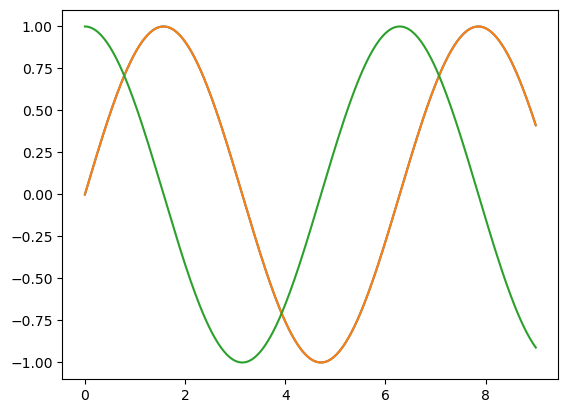

In [85]:
plt.plot(x,fx(x))
plt.plot(x,sin(x))
plt.plot(x,fx1(x))

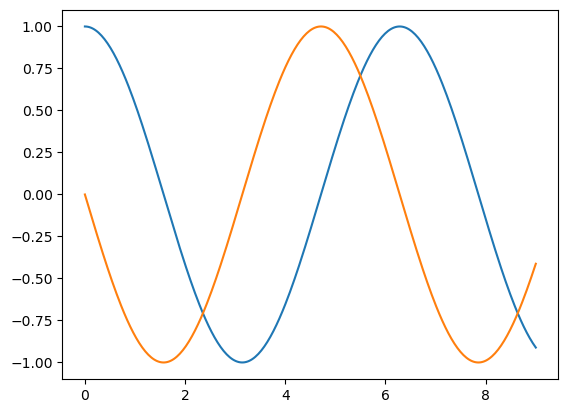

In [87]:
plt.plot(x,fx1(x))
plt.plot(x,fx2(x))

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 